In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC,SVR
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [37]:
def stratified_K_fold(X,y,model,n_splits):
    
    
    skf = StratifiedKFold(n_splits)

    fold_no=1
    
    score={}
    
    for train_index, test_index in skf.split(X, y):
        
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        model.fit(X_train,y_train)
        predictions = model.predict(X_test)
        
        score[fold_no]={'accuracy' : accuracy_score(y_test,predictions),'precision' : precision_score(y_test,predictions),
                        'recall' : recall_score(y_test,predictions), 'f1' : f1_score(y_test,predictions),
                        'specificity' : recall_score(y_test,predictions,pos_label=0)
                           }
        fold_no += 1
    score = pd.DataFrame.from_dict(score, orient = 'index')
    score.index.name = 'flod'
    return score
    

In [38]:
from sklearn.model_selection import ParameterGrid

def param_optimization(Model,X,y,n_splits,**param): 
    if False in [isinstance(key,str) for key in param.keys()]:
        raise ValueError("Keys must be string ")
    if False in [isinstance(value,list) for value in param.values()] and  False in [isinstance(value,tuple) for value in param.values()]:
        raise ValueError("Values must be list or tuples ")
        
    else:
        
        param_grid=ParameterGrid(param)
        df=pd.DataFrame(param_grid)
        for params in param_grid:
            model=SVC(**params)
            scores=stratified_K_fold(X,y,model,n_splits)
            for s in scores:
                df['mean '+ s]= scores[s].mean()
                df['std'+ s]= scores[s].std()
                df['min' + s] = scores[s].min()
                df['max' + s] = scores[s].max()
                df['median'+s]=scores[s].median()
        return df

In [17]:
import multiprocessing
from sklearn.metrics import make_scorer, roc_auc_score,roc_curve, auc, RocCurveDisplay
from sklearn.model_selection import GridSearchCV
scorers={}


def roc_auc_dummy(y_true, y_pred_proba):
    roc_auc = roc_auc_score(y_true, y_pred_proba)
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                       estimator_name='example estimator')
    display.plot()
    return roc_auc
scoring    = {'accuracy' : 'accuracy',
                                     'precision': 'precision',
                                     'recall'   : 'recall',
                                     'f1'       : 'f1',
                                     'sparsity' : lambda estimator, X, y: np.mean(np.abs(estimator.coef_) < 1e-8)}
scoring['roc_auc'] = make_scorer(roc_auc_dummy, needs_proba = True)


GridSearchCV(cv=2, estimator=SVC(probability=True),
             param_grid={'C': [1, 10, 100, 1000], 'kernel': ['linear']},
             refit=False,
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': make_scorer(roc_auc_dummy, needs_proba=True),
                      'sparsity': <function <lambda> at 0x000001968A17A3A0>})

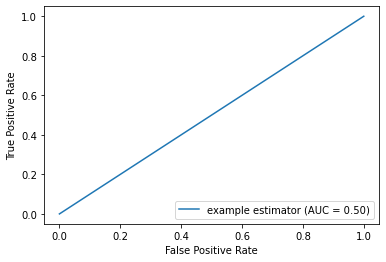

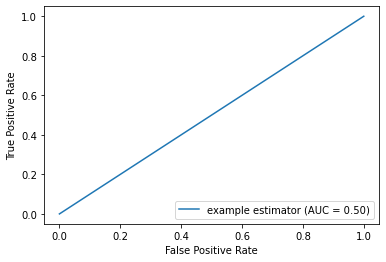

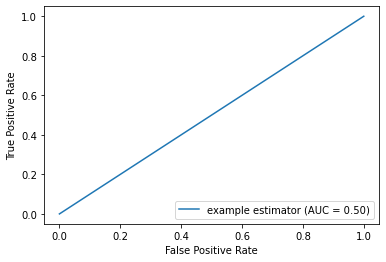

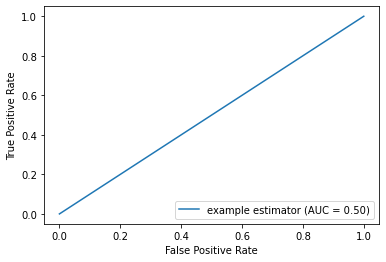

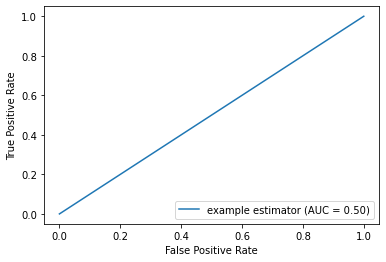

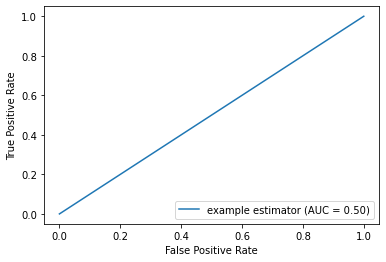

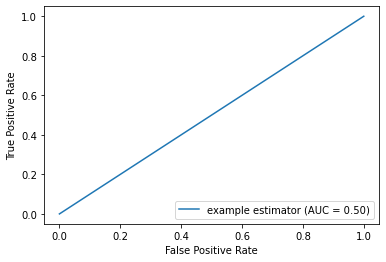

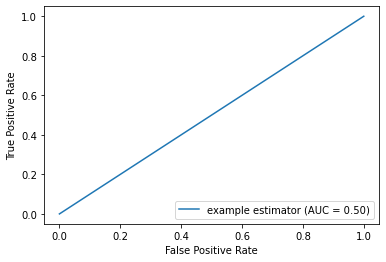

In [22]:
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([0, 0, 1, 1])
model = SVC(probability=True)
params={"kernel": ['linear'],  "C": [1, 10, 100, 1000]}


clf = GridSearchCV(model, params, scoring = scoring,refit=False,cv=2)
clf.fit(X, y)


In [44]:
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([0, 0, 1, 1])
n_splits=2 
tuned_parameters ={"kernel": ['rbf','linear'], "gamma": [1e-3, 1e-4], "C": [1, 10, 100, 1000], "C": [1, 10, 100, 1000]}


    
param_optimization(SVC,X,y,n_splits,**tuned_parameters)
    


,C,gamma,kernel,mean accuracy,stdaccuracy,minaccuracy,maxaccuracy,medianaccuracy,mean precision,stdprecision,...,mean f1,stdf1,minf1,maxf1,medianf1,mean specificity,stdspecificity,minspecificity,maxspecificity,medianspecificity
0,1,0.0010,rbf,0.5,0.0,0.5,0.5,0.5,0.5,0.0,...,0.666667,0.0,0.666667,0.666667,0.666667,0.0,0.0,0.0,0.0,0.0
1,1,0.0010,linear,0.5,0.0,0.5,0.5,0.5,0.5,0.0,...,0.666667,0.0,0.666667,0.666667,0.666667,0.0,0.0,0.0,0.0,0.0
2,1,0.0001,rbf,0.5,0.0,0.5,0.5,0.5,0.5,0.0,...,0.666667,0.0,0.666667,0.666667,0.666667,0.0,0.0,0.0,0.0,0.0
3,1,0.0001,linear,0.5,0.0,0.5,0.5,0.5,0.5,0.0,...,0.666667,0.0,0.666667,0.666667,0.666667,0.0,0.0,0.0,0.0,0.0
4,10,0.0010,rbf,0.5,0.0,0.5,0.5,0.5,0.5,0.0,...,0.666667,0.0,0.666667,0.666667,0.666667,0.0,0.0,0.0,0.0,0.0
5,10,0.0010,linear,0.5,0.0,0.5,0.5,0.5,0.5,0.0,...,0.666667,0.0,0.666667,0.666667,0.666667,0.0,0.0,0.0,0.0,0.0
6,10,0.0001,rbf,0.5,0.0,0.5,0.5,0.5,0.5,0.0,...,0.666667,0.0,0.666667,0.666667,0.666667,0.0,0.0,0.0,0.0,0.0
7,10,0.0001,linear,0.5,0.0,0.5,0.5,0.5,0.5,0.0,...,0.666667,0.0,0.666667,0.666667,0.666667,0.0,0.0,0.0,0.0,0.0
8,100,0.0010,rbf,0.5,0.0,0.5,0.5,0.5,0.5,0.0,...,0.666667,0.0,0.666667,0.666667,0.666667,0.0,0.0,0.0,0.0,0.0
9,100,0.0010,linear,0.5,0.0,0.5,0.5,0.5,0.5,0.0,...,0.666667,0.0,0.666667,0.666667,0.666667,0.0,0.0,0.0,0.0,0.0


In [1]:
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split
import pandas as pd
import re

import warnings
from sklearn.exceptions import UndefinedMetricWarning
warnings.filterwarnings('ignore', category=UndefinedMetricWarning) 

In [2]:
import pickle

(features, num_occurrences, features_cols_title), = list(pickle.load(open("Cache/function-make_features_labels_arrays", 'rb')).values())

In [ ]:
parameters = {'penalty': ('l1'), 'C': np.logspace(-3, -2, 2)}

n_splits = 3

res = GridSearchCV(LinearSVC(dual = False, max_iter = 200), 
                   parameters,
                   scoring = {'accuracy' : 'accuracy',
                              'precision': 'precision',
                              'recall'   : 'recall',
                              'f1'       : 'f1',
                              'sparsity' : lambda estimator, X, y: np.mean(np.abs(estimator.coef_) < 1e-8)}, 
                   refit = False,
                   verbose = 2,
                   return_train_score = True,
                   cv = StratifiedKFold(n_splits)).fit(features, np.int32(num_occurrences > 100))

df = pd.DataFrame(res.cv_results_)
df = df[[col for col in df.columns if col.startswith('param_') or re.match(r'^(mean|std)_(train|test)_', col)]]

# Changing names of sparsity columns and dropping duplicates.
df = df.drop(columns = ['mean_test_sparsity', 'std_test_sparsity']).rename(columns = {'mean_train_sparsity': 'mean_sparsity',
                                                                                      'std_train_sparsity' : 'std_sparsity'})
df

Fitting 3 folds for each of 2 candidates, totalling 6 fits


# FEATURE SELECTION

https://scikit-learn.org/stable/modules/feature_selection.html

In [ ]:
parameters = {'alpha': np.logspace(-4, 1, 6)}

n_splits = 20

res = GridSearchCV(Lasso(normalize = False, max_iter = 1000), 
                   parameters,
                   scoring = 'r2', 
                   refit = 'r2',
                   verbose = 2,
                   n_jobs = 4,
                   return_train_score = True,
                   cv = n_splits).fit(features, num_occurrences)

Fitting 20 folds for each of 6 candidates, totalling 120 fits


In [ ]:
df = pd.DataFrame(res.cv_results_)
df = df[[col for col in df.columns if col.startswith('param_') or re.match(r'^(mean|std)_(train|test)_', col)]]
df.sort_values('mean_test_score', ascending = False)

In [ ]:
res.best_estimator_.coef_